In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd '/Users/avishma/Desktop/Heart Disease Prediction/Dataset/Dataset'

/Users/avishma/Desktop/Heart Disease Prediction/Dataset/Dataset


In [3]:
data=pd.read_csv('HeartDisease.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


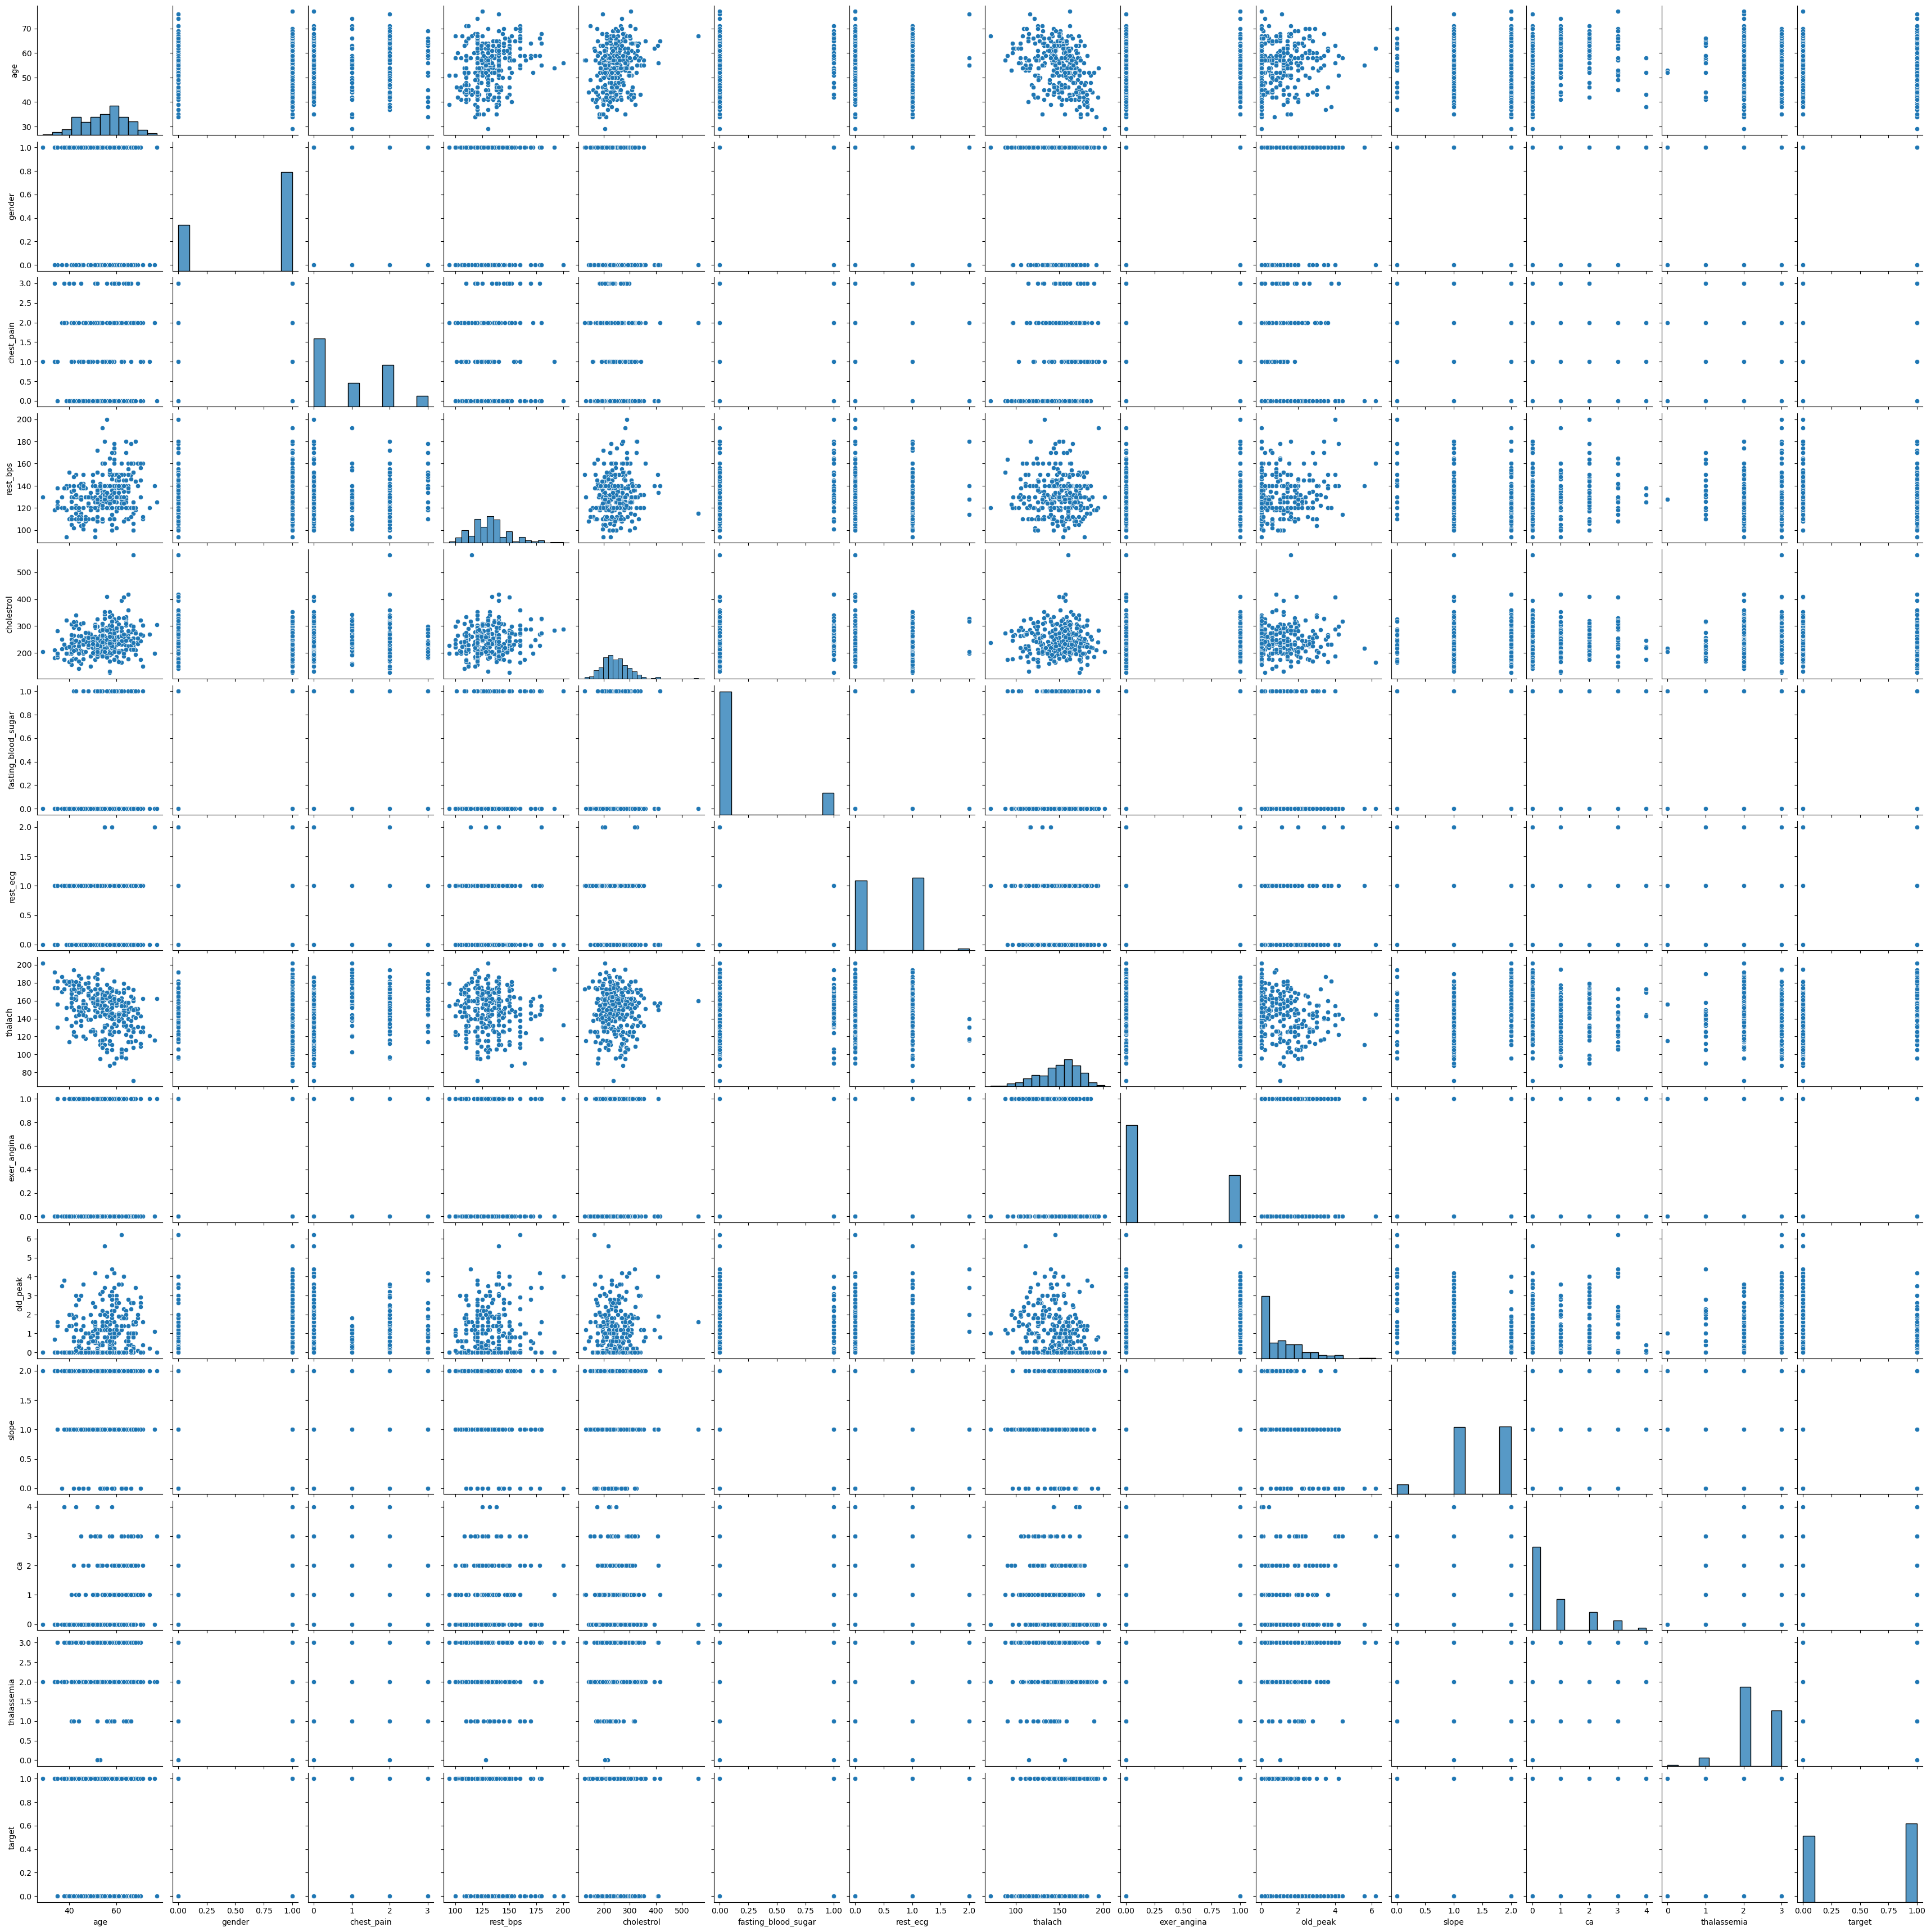

In [6]:
sns.pairplot(data)
plt.show()

In [7]:
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['gender'] = data.gender.replace({1: "Male", 0: "Female"})
data['chest_pain']=data.chest_pain.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
data['thalassemia']=data.thalassemia.replace({0:'defect',1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

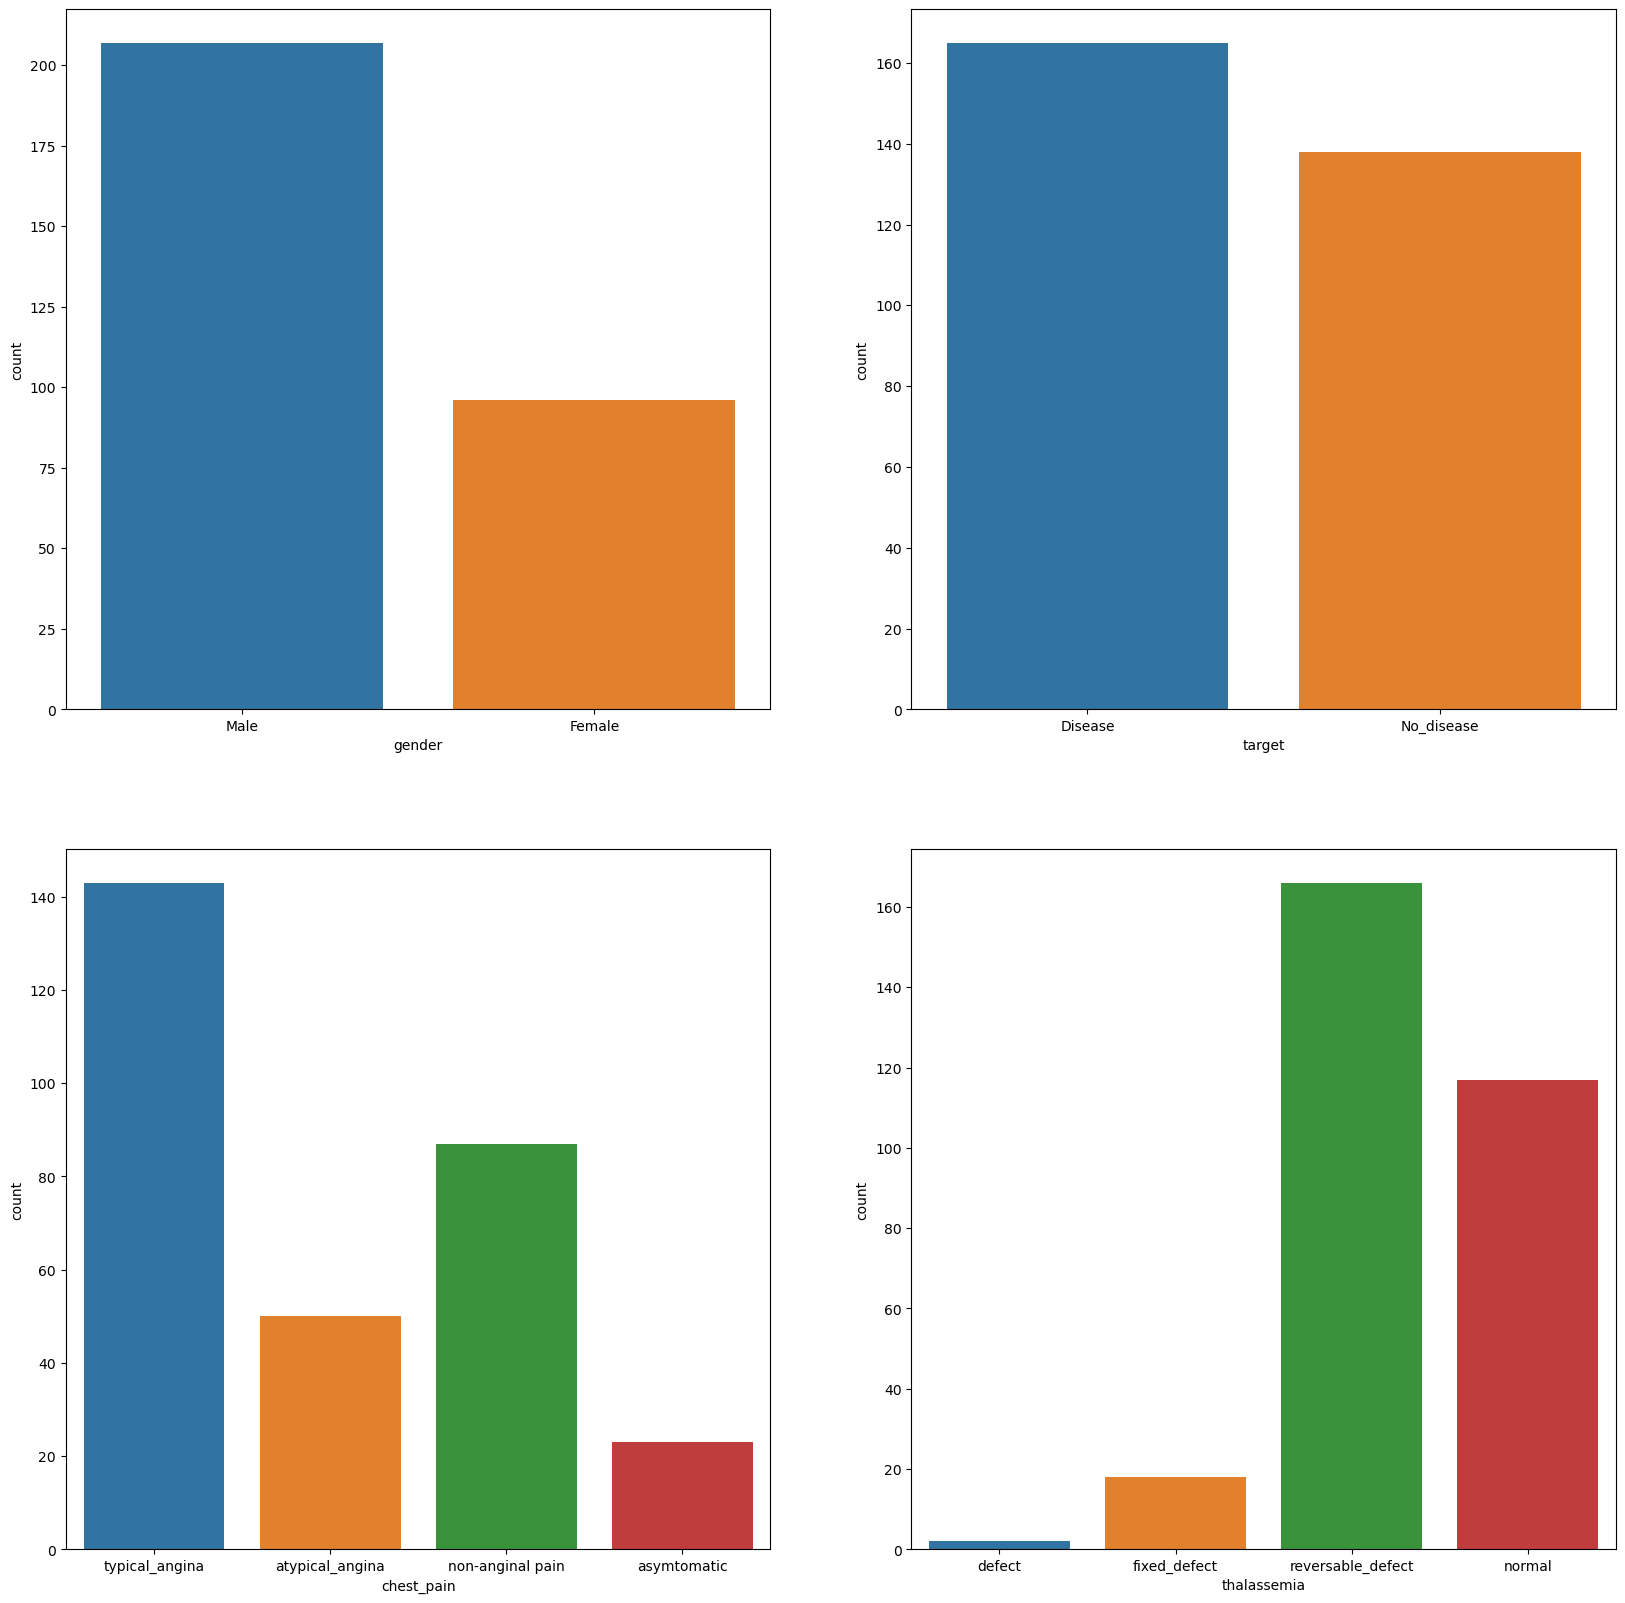

In [8]:
fig,axarr=plt.subplots(2,2,figsize=(20,20))
sns.countplot(x='gender',data=data,ax=axarr[0,0],order=['Male','Female'])
sns.countplot(x='target',data=data,ax=axarr[0,1],order=['Disease','No_disease'])
sns.countplot(x='chest_pain',data=data,ax=axarr[1,0],order=['typical_angina','atypical_angina','non-anginal pain',
                        'asymtomatic'])
sns.countplot(x='thalassemia',data=data,ax=axarr[1,1],order=['defect','fixed_defect', 'reversable_defect', 'normal'])



Text(0.5, 1.0, 'OVERALL')

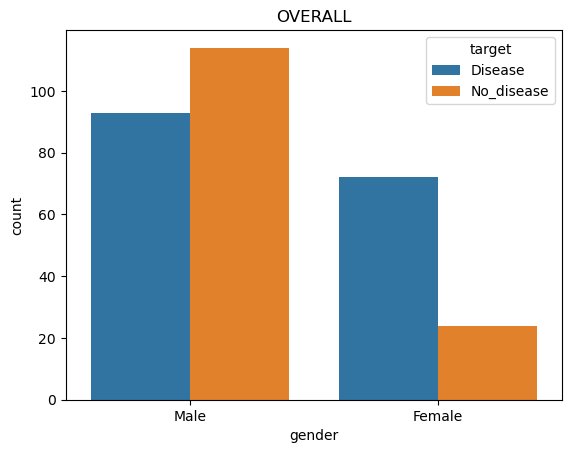

In [9]:
plt.subplot()   # overall
sns.countplot(data = data, x = 'gender', hue = 'target')
plt.title('OVERALL')

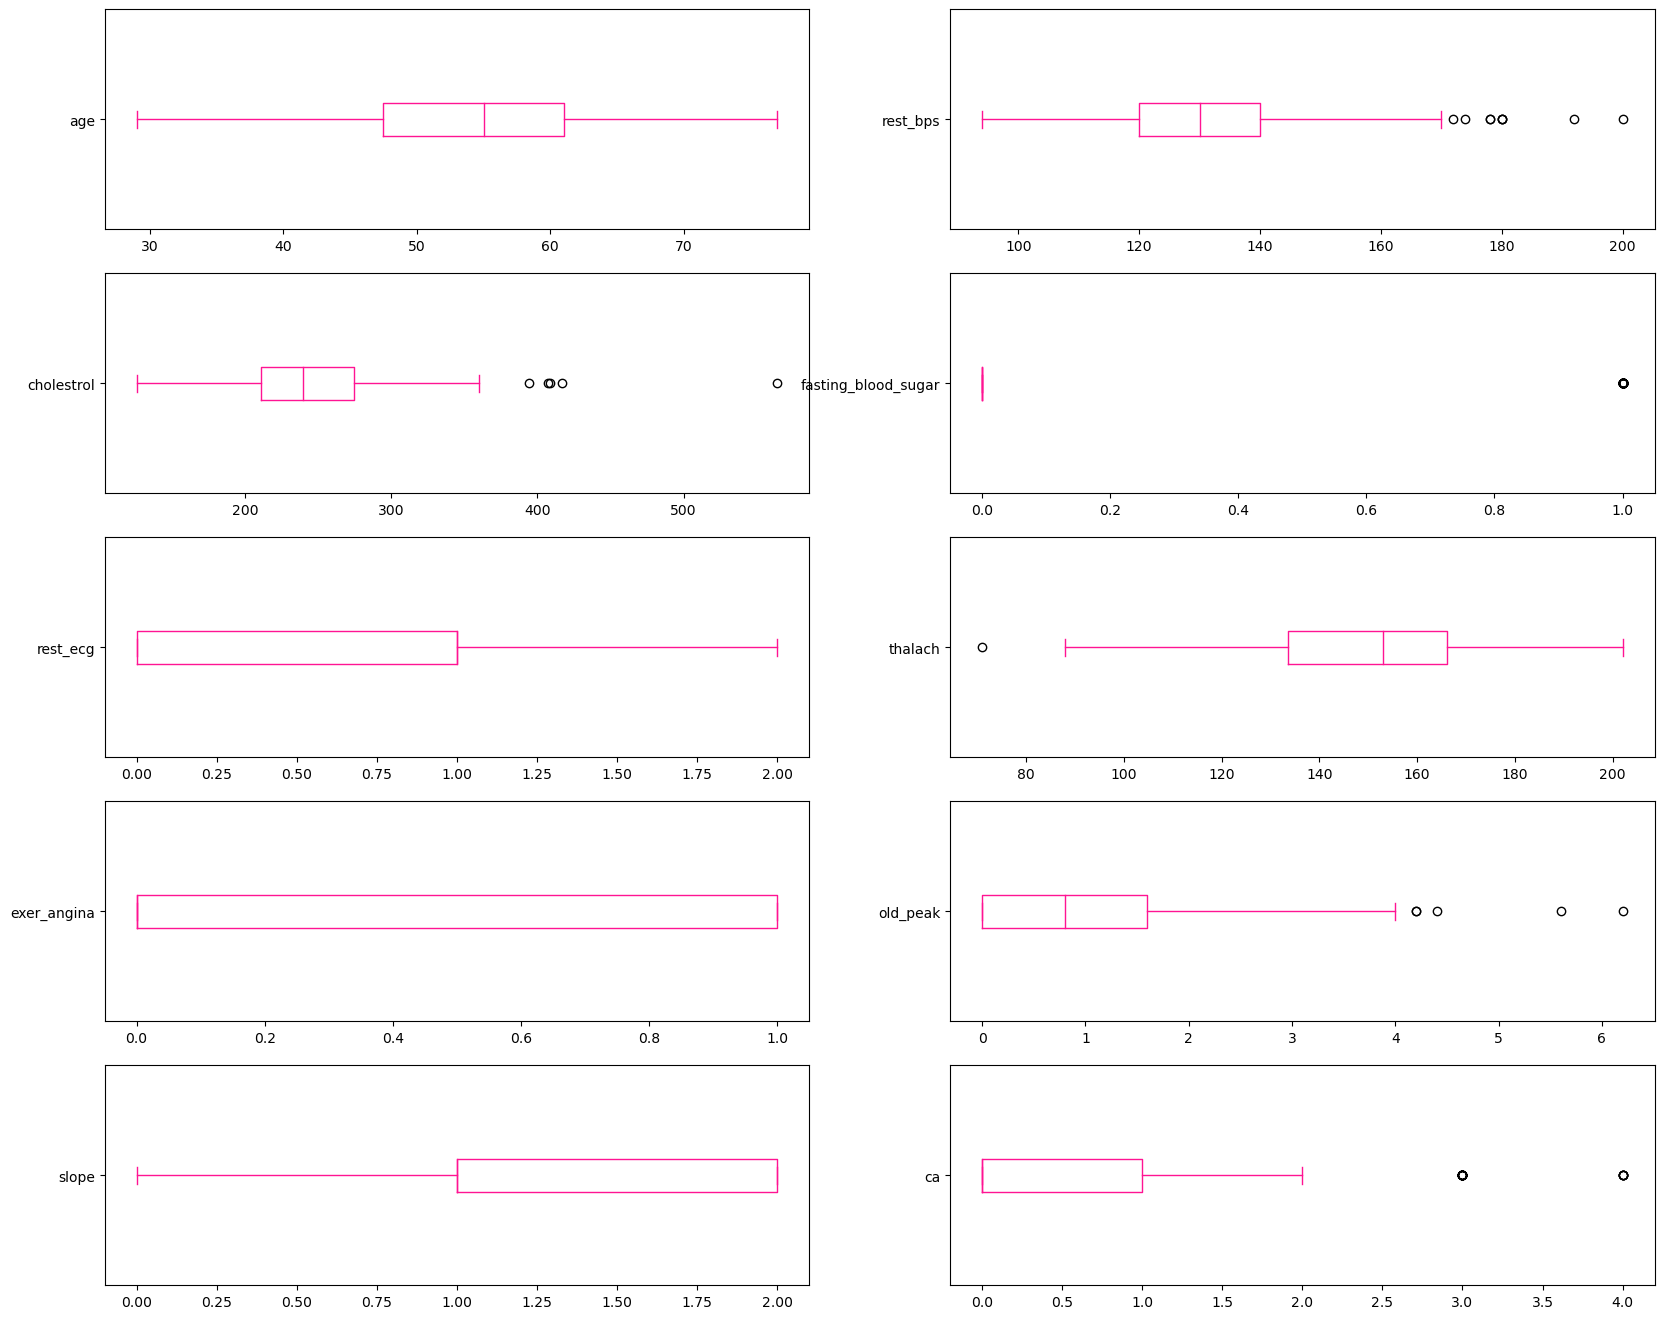

In [10]:
data.plot(kind='box', subplots=True, layout=(6,2),
sharex=False,sharey=False,figsize=(20, 20), 
color='deeppink',vert=False);

In [11]:
fig = data.box(data, x='target', y='chol')
fig.show()

AttributeError: 'DataFrame' object has no attribute 'box'

<AxesSubplot:xlabel='target', ylabel='ca'>

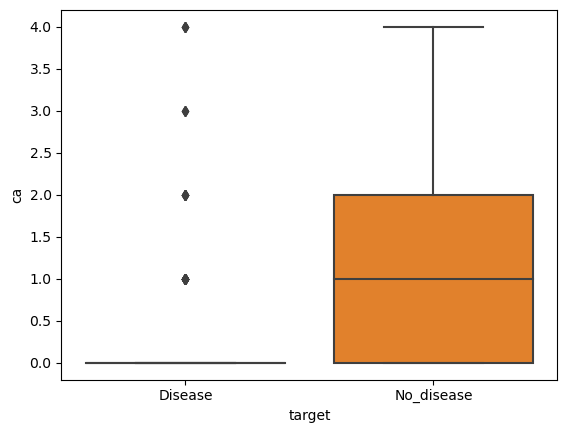

In [12]:
sns.boxplot(x='target',y='ca',data=data)

Disease       165
No_disease    138
Name: target, dtype: int64


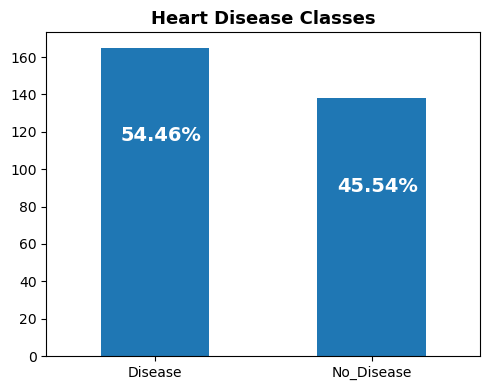

In [13]:
# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

print(data.target.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = data.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

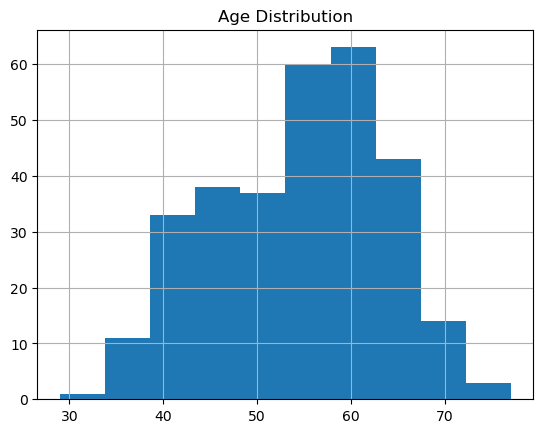

In [14]:
data.age.value_counts()
data['age'].hist().plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel=('Age')
plt.ylabel=('Frequency')

In [15]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,Male,asymtomatic,145,233,1,0,150,0,2.3,0,0,fixed_defect,Disease
1,37,Male,non-anginal pain,130,250,0,1,187,0,3.5,0,0,reversable_defect,Disease
2,41,Female,atypical_angina,130,204,0,0,172,0,1.4,2,0,reversable_defect,Disease
3,56,Male,atypical_angina,120,236,0,1,178,0,0.8,2,0,reversable_defect,Disease
4,57,Female,typical_angina,120,354,0,1,163,1,0.6,2,0,reversable_defect,Disease


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    object 
 2   chest_pain           303 non-null    object 
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    object 
 13  target               303 non-null    object 
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


In [17]:
objectcols=data.select_dtypes(include=['object'])
numericcols=data.select_dtypes(include=np.number)

In [18]:
pd.set_option('display.max_rows',100)
objectcols.head()

,gender,chest_pain,thalassemia,target
0,Male,asymtomatic,fixed_defect,Disease
1,Male,non-anginal pain,reversable_defect,Disease
2,Female,atypical_angina,reversable_defect,Disease
3,Male,atypical_angina,reversable_defect,Disease
4,Female,typical_angina,reversable_defect,Disease


In [19]:
objectcols.drop('target',axis=1)

,gender,chest_pain,thalassemia
0,Male,asymtomatic,fixed_defect
1,Male,non-anginal pain,reversable_defect
2,Female,atypical_angina,reversable_defect
3,Male,atypical_angina,reversable_defect
4,Female,typical_angina,reversable_defect
...,...,...,...
298,Female,typical_angina,normal
299,Male,asymtomatic,normal
300,Male,typical_angina,normal
301,Male,typical_angina,normal


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
object_encode=objectcols.apply(le.fit_transform)

In [23]:
pd.DataFrame(object_encode)

,gender,chest_pain,thalassemia,target
0,1,0,1,0
1,1,2,3,0
2,0,1,3,0
3,1,1,3,0
4,0,3,3,0
...,...,...,...,...
298,0,3,2,1
299,1,0,2,1
300,1,3,2,1
301,1,3,2,1


In [24]:
object_encode.head()

,gender,chest_pain,thalassemia,target
0,1,0,1,0
1,1,2,3,0
2,0,1,3,0
3,1,1,3,0
4,0,3,3,0


In [25]:
numericcols.head()

,age,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca
0,63,145,233,1,0,150,0,2.3,0,0
1,37,130,250,0,1,187,0,3.5,0,0
2,41,130,204,0,0,172,0,1.4,2,0
3,56,120,236,0,1,178,0,0.8,2,0
4,57,120,354,0,1,163,1,0.6,2,0


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
numericcols.columns

Index(['age', 'rest_bps', 'cholestrol', 'fasting_blood_sugar', 'rest_ecg',
       'thalach', 'exer_angina', 'old_peak', 'slope', 'ca'],
      dtype='object')

In [36]:
s=StandardScaler()

In [37]:
numeric_s=s.fit_transform(numericcols.drop('age',axis=1))

In [39]:
pd.DataFrame(numeric_s,columns=['rest_bps', 'cholestrol', 'fasting_blood_sugar',
       'rest_ecg', 'thalach', 'exer_angina', 'old_peak', 'slope', 'ca'])

,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca
0,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429
1,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429
2,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429
3,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429
4,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429
...,...,...,...,...,...,...,...,...,...
298,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429
299,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429
300,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593
301,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082
